## Cystectonomy Lymph Node Study
**September 2019**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## I. Data cleaning script

#### Upload Original data

In [79]:
df = pd.read_csv('./data/Cystectomy-LN-Study_LR-CSV.csv')

Clean up

In [80]:
#Drop null columns
df.drop([208,209],inplace=True)
#Convert Case Number ot int
df.astype({'Case Number': 'int32'})
df.set_index('Case Number',inplace=True)
#Clean up sex, alive/dead column:
df.replace({'male': 'Male', 'M':'Male','female': 'Female','F':'Female'},inplace=True)
df['alive/dead'].replace({'ALIVE':'alive'},inplace=True)
#Make binary is Male, is alive column (1=yes)
df['Male'] = df['Sex'].replace({'Male':1,'Female':0})
#Make binary is alive column (0 = dead, 1= alive)
df['alive'] = df['alive/dead'].replace({'alive':1,'dead':0})

In [ ]:
#Save cleaned file
#df.to_csv('./data/Cystectomy_cleaned.csv')

#### Upload data with Extended Categories

In [275]:
#Includes additional field "Extent of LND"
#Lymph Node Dissection (0=no LND, 1=limited, 2=extended, 3=superextended)
df = pd.read_csv('./data/Cystectomy_cleaned_with_LND_Extent.csv')

Clean Up

In [276]:
#create alive_awd (0 = dead, 1 = alive, 2 = alive with disease)
def label_awd(row):
    if row['alive'] == 0:
        return 0
    elif row['alive'] ==1 and row['AWD?'] == 1:
        return 2
    elif row['alive'] ==1 and row['AWD?'] ==0:
        return 1

In [277]:
#Apply to new column
df['alive_awd'] = df.apply(lambda row: label_awd(row), axis=1)

#Edit bins for # Examined, replace old one
df.rename(columns={'binned':'binned_LNs_examined'},inplace=True)
bins = [0,5,10,15,20,25,30,35,40,45,50,75]
labels= [1,2,3,4,5,6,7,8,9,10,11]
df['binned_LNs_examined'] = pd.cut(df['# LNs examined'], bins=bins, labels=labels)

#Add Descriptions to Extent of LND
df['Extent of LND Description'] = df['Extent of LND'].replace({0:'None',
                                                               1:'Limited',
                                                               2:'Extended',
                                                               3:'Super Extended'})
#Write ot csv
df.to_csv('./data/Cystectomy_cleaned_with_LND_Extent_updated.csv')

In [278]:
df.head()

,Case Number,Sex,Age at bx,Date of Cystectomy,Last F/U date,F/U mos,alive/dead,AWD?,# LNs examined,# LNs +,# LN specimens,Male,alive,binned_LNs_examined,Extent of LND,Other/Notes/Complications,Flag,alive_awd,Extent of LND Description
0,1,Male,68,3/3/09,8/13/19,125,alive,0.0,18,0,3,1,1,4,1,NaN,NaN,1,Limited
1,2,Female,80,1/30/09,1/2/13,47,alive,0.0,13,0,4,0,1,3,2,NaN,NaN,1,Extended
2,3,Female,73,3/24/09,9/9/11,29,alive,1.0,24,4,3,0,1,5,1,NaN,NaN,2,Limited
3,4,Male,82,3/30/09,9/3/19,125,alive,0.0,7,0,2,1,1,2,1,NaN,NaN,1,Limited
4,5,Male,73,5/1/09,2/12/10,9,alive,0.0,9,0,3,1,1,2,1,NaN,NaN,1,Limited


In [279]:
#Percent of male vs female patients
df['Sex'].value_counts(normalize=True)

Male      0.676329
Female    0.323671
Name: Sex, dtype: float64

In [280]:
df['alive/dead'].value_counts()

alive    183
dead      24
Name: alive/dead, dtype: int64

In [281]:
df['alive_awd'].value_counts()

1    127
2     56
0     24
Name: alive_awd, dtype: int64

In [282]:
df['# LNs +'].value_counts(normalize=True)
#14% positive rate

0     0.748792
1     0.082126
3     0.043478
2     0.038647
18    0.014493
5     0.014493
4     0.014493
28    0.004831
23    0.004831
19    0.004831
16    0.004831
13    0.004831
11    0.004831
10    0.004831
9     0.004831
6     0.004831
Name: # LNs +, dtype: float64

In [283]:
df['Case Number'][df['# LNs +']>0].count(),df['Case Number'][df['# LNs +']==0].count()
#52 were positive, 155 were 0

(52, 155)

In [284]:
df['Flag'].isnull().sum()

191

In [285]:
#Filter for 
#df[df['Flag'] == 'R']

In [286]:
df['# LNs examined'].describe()

count    207.000000
mean      22.932367
std       14.566395
min        0.000000
25%       13.000000
50%       20.000000
75%       28.000000
max       75.000000
Name: # LNs examined, dtype: float64

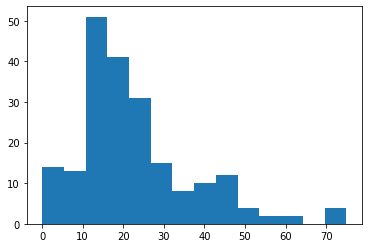

In [287]:
plt.hist(df['# LNs examined'],bins=14);

In [288]:
df['binned_LNs_examined'].value_counts()
#now bins are more uniform, approximately like the histogram above

3     45
4     37
5     34
6     18
2     13
7     11
11    10
10    10
8      9
1      7
9      6
Name: binned_LNs_examined, dtype: int64

## II. Extent of LNDs 
### (A) Extent of LNDs metrics

**1a. Group by Extent of LND - Average**

In [289]:
df_count = df.groupby('Extent of LND').count()
df_count = df_count['Case Number']

In [290]:
#Mean by Extent of LND
df_mean_data = df.groupby('Extent of LND').mean()
df_mean = pd.DataFrame(df_mean_data)
df_mean = df_mean[['# LNs examined','# LNs +','# LN specimens']]
df_mean['Count'] = df_count
#output sent to csv
df_mean.to_csv('./data/output_data/Extent_of_LND_mean.csv')
df_mean

,# LNs examined,# LNs +,# LN specimens,Count
Extent of LND,,,,
0,0.833333,0.000000,0.000000,6
1,16.670103,0.855670,2.742268,97
2,23.074627,1.388060,6.044776,67
3,42.675676,2.702703,12.081081,37


**1b. Group by Extent of LND - Sum**

In [291]:
df_count = df.groupby('Extent of LND').count()
df_count = df_count['Case Number']

In [292]:
#Mean by Extent of LND
df_sum_data = df.groupby('Extent of LND').sum()
df_sum = pd.DataFrame(df_sum_data)
df_sum = df_sum[['# LNs examined','# LNs +','# LN specimens']]
df_sum['Count'] = df_count
#output sent to csv
df_sum.to_csv('./data/output_data/Extent_of_LND_sum.csv')
df_sum

,# LNs examined,# LNs +,# LN specimens,Count
Extent of LND,,,,
0,5,0,0,6
1,1617,83,266,97
2,1546,93,405,67
3,1579,100,447,37


**2. Group by Extent of LND - positive only**

In [264]:
df_pos = df[df['# LNs +']>0]
df_pos.shape

(52, 19)

In [265]:
#Mean by Extent of LND
df_count = df_pos.groupby('Extent of LND').count()
df_count = df_count['Case Number']

df_mean_data = df_pos.groupby('Extent of LND').mean()
df_mean = pd.DataFrame(df_mean_data)
df_mean = df_mean[['# LNs examined','# LNs +','# LN specimens']]
df_mean['Count'] = df_count
#output sent to csv
df_mean.to_csv('./data/output_data/Extent_of_LND_mean_pos_only.csv')
df_mean

,# LNs examined,# LNs +,# LN specimens,Count
Extent of LND,,,,
1,17.333333,3.458333,2.333333,24
2,23.187500,5.812500,6.250000,16
3,41.416667,8.333333,10.416667,12


**3. Group by Extent of LND and outcome**

In [266]:
df_count = df.groupby(['Extent of LND','alive_awd']).count()
df_count = df_count['Case Number']

In [267]:
df_mean_data = df.groupby(['Extent of LND','alive_awd']).mean()
df_mean = pd.DataFrame(df_mean_data)
df_mean = df_mean[['# LNs examined','# LNs +','# LN specimens']]
df_mean['Count'] = df_count
df_mean.to_csv('./data/output_data/Extent_of_LND_&_alive-awd_mean.csv')
df_mean

# LNs examined   # LNs +  # LN specimens  Count
Extent of LND alive_awd                                                 
0             1                1.000000  0.000000        0.000000      5
              2                0.000000  0.000000        0.000000      1
1             0               18.100000  2.100000        3.500000     10
              1               15.746032  0.190476        2.730159     63
              2               18.500000  2.083333        2.458333     24
2             0               18.250000  0.500000        5.333333     12
              1               24.571429  1.085714        5.971429     35
              2               23.350000  2.450000        6.600000     20
3             0               40.000000  5.000000        9.000000      2
              1               47.041667  2.708333       13.041667     24
              2               33.636364  2.272727       10.545455     11

**4. Group by Extent of LND and outcome - positive only**

In [268]:
df_count = df_pos.groupby(['Extent of LND','alive_awd']).count()
df_count = df_count['Case Number']

In [269]:
df_mean_data = df_pos.groupby(['Extent of LND','alive_awd']).mean()
df_mean = pd.DataFrame(df_mean_data)
df_mean = df_mean[['# LNs examined','# LNs +','# LN specimens']]
df_mean['Count'] = df_count
df_mean.to_csv('./data/output_data/Extent_of_LND_&_alive-awd_mean_pos_only.csv')
df_mean

# LNs examined    # LNs +  # LN specimens  Count
Extent of LND alive_awd                                                  
1             0               14.250000   5.250000        2.500000      4
              1               13.250000   1.500000        1.875000      8
              2               21.083333   4.166667        2.583333     12
2             0               16.000000   3.000000        4.000000      2
              1               24.500000   6.333333        6.333333      6
              2               24.000000   6.125000        6.750000      8
3             0               40.000000   5.000000        9.000000      2
              1               47.800000  13.000000       12.800000      5
              2               35.600000   5.000000        8.600000      5

**5. Group by all fields**

In [293]:
df_count = df.groupby(['Extent of LND','alive_awd','# LNs examined','# LNs +','# LN specimens','Age at bx']).count()
df_count = df_count['Case Number']

df_mean_data = df.groupby(['Extent of LND','alive_awd','# LNs examined','# LNs +','# LN specimens','Age at bx']).mean()
df_mean = pd.DataFrame(df_mean_data)
#df_mean = df_mean[['# LN specimens']]
df_mean['Count'] = df_count
#df_mean = df_mean[['Count']]

df_mean.to_csv('./data/output_data/Extent_of_LND_all_data_mean.csv')
#df_mean

### (B) Extent of LND Viz

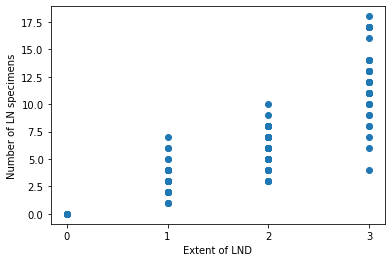

In [232]:
plt.scatter(df['Extent of LND'],df['# LN specimens'])
plt.xlabel("Extent of LND")
plt.xticks([0,1,2,3])
plt.ylabel("Number of LN specimens");

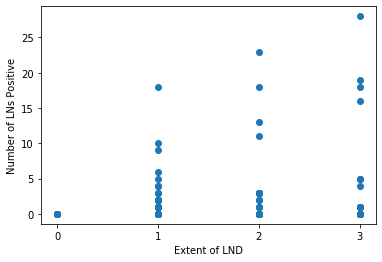

In [233]:
plt.scatter(df['Extent of LND'],df['# LNs +'])
plt.xlabel("Extent of LND")
plt.xticks([0,1,2,3])
plt.ylabel("Number of LNs Positive");

## III. Number of LNs Examined 
### (A) metrics


**1a. Group by Examined bins - Average**

In [300]:
df_count = df.groupby('binned_LNs_examined').count()
df_count = df_count['Case Number']

In [301]:
#Mean by Binned LNs Examined
df_mean_data = df.groupby('binned_LNs_examined').mean()
df_mean = pd.DataFrame(df_mean_data)
df_mean = df_mean[['# LNs examined','# LNs +','# LN specimens']]
df_mean['Count'] = df_count
#output sent to csv
df_mean.to_csv('./data/output_data/Examined_bins_mean.csv')
df_mean

,# LNs examined,# LNs +,# LN specimens,Count
binned_LNs_examined,,,,
1,4.000000,0.714286,1.428571,7
2,8.538462,0.307692,3.461538,13
3,13.066667,0.422222,3.577778,45
4,18.189189,1.837838,4.486486,37
5,22.647059,1.411765,4.352941,34
6,27.444444,0.500000,5.944444,18
7,33.272727,4.454545,7.090909,11
8,38.888889,0.111111,8.111111,9
9,43.666667,3.000000,11.333333,6


**1b. Group by Examined bins - Sum**

In [302]:
df_count = df.groupby('binned_LNs_examined').count()
df_count = df_count['Case Number']

In [303]:
#Mean by Examined Bins
df_sum_data = df.groupby('binned_LNs_examined').sum()
df_sum = pd.DataFrame(df_sum_data)
df_sum = df_sum[['# LNs examined','# LNs +','# LN specimens']]
df_sum['Count'] = df_count
#output sent to csv
df_sum.to_csv('./data/output_data/Examined_bins_sum.csv')
df_sum

,# LNs examined,# LNs +,# LN specimens,Count
binned_LNs_examined,,,,
1,28,5,10,7
2,111,4,45,13
3,588,19,161,45
4,673,68,166,37
5,770,48,148,34
6,494,9,107,18
7,366,49,78,11
8,350,1,73,9
9,262,18,68,6


**2. Group by Examined bins - positive only**

In [306]:
df_pos = df[df['# LNs +']>0]
df_pos.shape

(52, 19)

In [307]:
#Mean by Examined Bins
df_count = df_pos.groupby('binned_LNs_examined').count()
df_count = df_count['Case Number']

df_mean_data = df_pos.groupby('binned_LNs_examined').mean()
df_mean = pd.DataFrame(df_mean_data)
df_mean = df_mean[['# LNs examined','# LNs +','# LN specimens']]
df_mean['Count'] = df_count
#output sent to csv
df_mean.to_csv('./data/output_data/Examined_bins_mean_pos_only.csv')
df_mean

,# LNs examined,# LNs +,# LN specimens,Count
binned_LNs_examined,,,,
1,4.333333,1.666667,2.333333,3
2,7.000000,2.000000,5.000000,2
3,12.555556,2.111111,2.555556,9
4,19.200000,6.800000,4.200000,10
5,22.500000,4.800000,3.800000,10
6,26.666667,1.500000,7.000000,6
7,33.250000,12.250000,5.250000,4
8,39.000000,1.000000,8.000000,1
9,42.000000,18.000000,8.000000,1


**3. Group by Examined bins and outcome**

In [304]:
df_count = df.groupby(['binned_LNs_examined','alive_awd']).count()
df_count = df_count['Case Number']

In [305]:
df_mean_data = df.groupby(['binned_LNs_examined','alive_awd']).mean()
df_mean = pd.DataFrame(df_mean_data)
df_mean = df_mean[['# LNs examined','# LNs +','# LN specimens']]
df_mean['Count'] = df_count
df_mean.to_csv('./data/output_data/Examined_bins_&_alive-awd_mean.csv')
df_mean

# LNs examined    # LNs +  # LN specimens  \
binned_LNs_examined alive_awd                                              
1                   0                5.000000   1.000000        4.000000   
                    1                3.600000   0.800000        0.800000   
                    2                5.000000   0.000000        2.000000   
2                   0                8.000000   0.000000        3.000000   
                    1                9.000000   0.000000        2.500000   
                    2                7.750000   1.000000        5.500000   
3                   0               12.428571   1.142857        4.428571   
                    1               13.107143   0.107143        3.714286   
                    2               13.400000   0.800000        2.600000   
4                   0               17.750000   2.250000        3.750000   
                    1               17.833333   2.125000        4.250000   
                    2               19.333333   0.888889        5.444444   
5                   0               22.000000   1.750000        4.750000   
                    1               23.117647   0.411765        4.176471   
                    2               22.333333   3.000000        4.333333   
6                   0               30.000000   0.000000        8.000000   
                    1               27.555556   0.444444        4.888889   
                    2               27.000000   0.625000        6.875000   
7                   0                     NaN        NaN             NaN   
                    1               33.250000   0.000000        9.500000   
                    2               33.285714   7.000000        5.714286   
8                   0                     NaN        NaN             NaN   
                    1               38.888889   0.111111        8.111111   
                    2                     NaN        NaN             NaN   
9                   0               45.000000   0.000000        6.000000   
                    1               43.750000   0.000000       13.500000   
                    2               42.000000  18.000000        8.000000   
10                  0                     NaN        NaN             NaN   
                    1               47.500000   0.000000       11.500000   
                    2               47.750000   0.250000       12.000000   
11                  0               58.000000   5.000000       12.000000   
                    1               64.625000   5.625000       14.000000   
                    2               54.000000   4.000000       14.000000   

                               Count  
binned_LNs_examined alive_awd         
1                   0            1.0  
                    1            5.0  
                    2            1.0  
2                   0            1.0  
                    1            8.0  
                    2            4.0  
3                   0            7.0  
                    1           28.0  
                    2           10.0  
4                   0            4.0  
                    1           24.0  
                    2            9.0  
5                   0            8.0  
                    1           17.0  
                    2            9.0  
6                   0            1.0  
                    1            9.0  
                    2            8.0  
7                   0            NaN  
                    1            4.0  
                    2            7.0  
8                   0            NaN  
                    1            9.0  
                    2            NaN  
9                   0            1.0  
                    1            4.0  
                    2            1.0  
10                  0            NaN  
                    1            6.0  
                    2            4.0  
11                  0            1.0  
                    1            8.0  
                    2            1.0

**4. Group by Examined bins and outcome - positive only**

In [308]:
df_count = df_pos.groupby(['binned_LNs_examined','alive_awd']).count()
df_count = df_count['Case Number']

In [309]:
df_mean_data = df_pos.groupby(['binned_LNs_examined','alive_awd']).mean()
df_mean = pd.DataFrame(df_mean_data)
df_mean = df_mean[['# LNs examined','# LNs +','# LN specimens']]
df_mean['Count'] = df_count
df_mean.to_csv('./data/output_data/Examined_bins_&_alive-awd_mean_pos_only.csv')
df_mean

# LNs examined    # LNs +  # LN specimens  \
binned_LNs_examined alive_awd                                              
1                   0                5.000000   1.000000        4.000000   
                    1                4.000000   2.000000        1.500000   
                    2                     NaN        NaN             NaN   
2                   0                     NaN        NaN             NaN   
                    1                     NaN        NaN             NaN   
                    2                7.000000   2.000000        5.000000   
3                   0               11.000000   4.000000        2.500000   
                    1               12.333333   1.000000        2.000000   
                    2               13.500000   2.000000        3.000000   
4                   0               20.000000   9.000000        2.000000   
                    1               18.600000  10.200000        4.800000   
                    2               19.750000   2.000000        4.000000   
5                   0               21.333333   4.666667        4.333333   
                    1               23.000000   2.333333        4.000000   
                    2               23.000000   6.750000        3.250000   
6                   0                     NaN        NaN             NaN   
                    1               26.000000   2.000000        8.500000   
                    2               27.000000   1.250000        6.250000   
7                   0                     NaN        NaN             NaN   
                    1                     NaN        NaN             NaN   
                    2               33.250000  12.250000        5.250000   
8                   0                     NaN        NaN             NaN   
                    1               39.000000   1.000000        8.000000   
                    2                     NaN        NaN             NaN   
9                   0                     NaN        NaN             NaN   
                    1                     NaN        NaN             NaN   
                    2               42.000000  18.000000        8.000000   
10                  0                     NaN        NaN             NaN   
                    1                     NaN        NaN             NaN   
                    2               47.000000   1.000000        9.000000   
11                  0               58.000000   5.000000       12.000000   
                    1               64.666667  15.000000       15.666667   
                    2               54.000000   4.000000       14.000000   

                               Count  
binned_LNs_examined alive_awd         
1                   0            1.0  
                    1            2.0  
                    2            NaN  
2                   0            NaN  
                    1            NaN  
                    2            2.0  
3                   0            2.0  
                    1            3.0  
                    2            4.0  
4                   0            1.0  
                    1            5.0  
                    2            4.0  
5                   0            3.0  
                    1            3.0  
                    2            4.0  
6                   0            NaN  
                    1            2.0  
                    2            4.0  
7                   0            NaN  
                    1            NaN  
                    2            4.0  
8                   0            NaN  
                    1            1.0  
                    2            NaN  
9                   0            NaN  
                    1            NaN  
                    2            1.0  
10                  0            NaN  
                    1            NaN  
                    2            1.0  
11                  0            1.0  
                    1            3.0  
                    2            1.0

**5. Examined bins - Group by all fields**

### (B) Viz

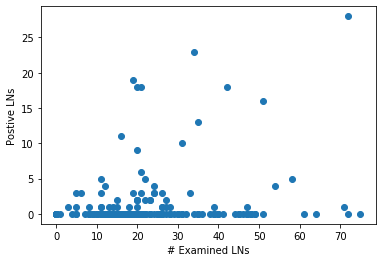

In [228]:
plt.scatter(df['# LNs examined'],df['# LNs +'],label=('binned examined','positive'))
plt.ylabel("Postive LNs")
plt.xlabel("# Examined LNs");

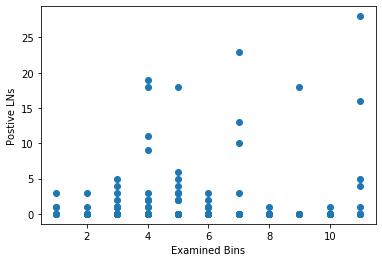

In [128]:
plt.scatter(df['binned_LNs_examined'],df['# LNs +'],label=('binned examined','positive'))
plt.ylabel("Postive LNs")
plt.xlabel("Examined Bins");

## IV. Hypothesis testing

In [5]:
df = pd.read_csv('./data/Cystectomy_cleaned_with_LND_Extent_updated.csv',index_col=0)
df.head()

,Case Number,Sex,Age at bx,Date of Cystectomy,Last F/U date,F/U mos,alive/dead,AWD?,# LNs examined,# LNs +,# LN specimens,Male,alive,binned_LNs_examined,Extent of LND,Other/Notes/Complications,Flag,alive_awd,Extent of LND Description
0,1,Male,68,3/3/09,8/13/19,125,alive,0.0,18,0,3,1,1,4.0,1,NaN,NaN,1,Limited
1,2,Female,80,1/30/09,1/2/13,47,alive,0.0,13,0,4,0,1,3.0,2,NaN,NaN,1,Extended
2,3,Female,73,3/24/09,9/9/11,29,alive,1.0,24,4,3,0,1,5.0,1,NaN,NaN,2,Limited
3,4,Male,82,3/30/09,9/3/19,125,alive,0.0,7,0,2,1,1,2.0,1,NaN,NaN,1,Limited
4,5,Male,73,5/1/09,2/12/10,9,alive,0.0,9,0,3,1,1,2.0,1,NaN,NaN,1,Limited


**Question: Is the change in avg # of positive LNs higher for Extended (2) vs Ltd (1) Lymph Node Dissections?**

 
> **H0:** The difference in # LNs positive between the experimental and control groups is 0.

> **HA:** The difference in # LNs positive between the experimental and control groups is not 0.

If $p\text{-value} < \alpha$, there IS a statisically significant difference between the two groups <br>
If $p\text{-value} \ge \alpha$, there is no statistical difference between your two groups.<br>

Let $\alpha$  = 0.05

Experiment 1: All Extent of LND = 1 vs 2 <br>

In [58]:
#Control: LTD LND (Extent of LND = 1)
# Import scipy.stats
import scipy.stats as stats

control = np.array(df['# LNs +'][df['Extent of LND']==1])
print(control.mean())

experimental = np.array(df['# LNs +'][df['Extent of LND']==2])
print(experimental.mean())

#Difference in mean
print(experimental.mean()- control.mean())

0.8556701030927835
1.3880597014925373
0.5323895983997539


In [59]:
# Conduct our t-test.
stats.ttest_ind(experimental, control)
t_stat, p_value = stats.ttest_ind(experimental, control)

In [60]:
t_stat,p_value

(1.0451178738551117, 0.29752544397318975)

In [61]:
p_value

0.29752544397318975

**Conclusion:** <br>
Since p-value .298 is greater than alpha, there is not a statistically significant difference between Limited & Extended (all patients)

Experiment 2: Extent of LND = 2 vs 3

In [62]:
#Control: LTD LND (Extent of LND = 1)
# Import scipy.stats
import scipy.stats as stats

control = np.array(df['# LNs +'][df['Extent of LND']==2])
print(control.mean())

experimental = np.array(df['# LNs +'][df['Extent of LND']==3])
print(experimental.mean())

#Difference in mean
print(experimental.mean()- control.mean())

1.3880597014925373
2.7027027027027026
1.3146430012101653


In [63]:
# Conduct our t-test.
stats.ttest_ind(experimental, control)
t_stat, p_value = stats.ttest_ind(experimental, control)

In [64]:
t_stat,p_value

(1.2679630986384665, 0.20769780628083168)

**Conclusion:** <br>
Since p-value .208 is greater than alpha, there is not a statistically significant difference between Extende and Super Extended (all patients)

Experiment 3: Extent of LND = 1 vs 2, # LNs + >0 

In [66]:
#Control: LTD LND (Extent of LND = 1)
# Import scipy.stats
import scipy.stats as stats

control = np.array(df['# LNs +'][(df['Extent of LND']==1)& (df['# LNs +']>0)])
print(control.mean())

experimental = np.array(df['# LNs +'][(df['Extent of LND']==2)& (df['# LNs +']>0)])
print(experimental.mean())

#Difference in mean
print(experimental.mean()- control.mean())

3.4583333333333335
5.8125
2.3541666666666665


In [67]:
# Conduct our t-test.
stats.ttest_ind(experimental, control)
t_stat, p_value = stats.ttest_ind(experimental, control)

In [68]:
t_stat,p_value

(1.3953499865542074, 0.17101194098632874)

**Conclusion:** <br>
Since p-value .171 is greater than alpha, there is not a statistically significant difference between Limited and Extended

#### Experiment 4: Extent of LND = 2 vs 3, # LNs + >0 

In [72]:
#Control: LTD LND (Extent of LND = 1)
# Import scipy.stats
import scipy.stats as stats

control = np.array(df['# LNs +'][(df['Extent of LND']==2)& (df['# LNs +']>0)])
print(control.mean())

experimental = np.array(df['# LNs +'][(df['Extent of LND']==3)& (df['# LNs +']>0)])
print(experimental.mean())

#Difference in mean
print(experimental.mean()- control.mean())

5.8125
8.333333333333334
2.520833333333334


In [73]:
# Conduct our t-test.
stats.ttest_ind(experimental, control)
t_stat, p_value = stats.ttest_ind(experimental, control)

In [74]:
t_stat,p_value

(0.8313791495149455, 0.41332990826682425)

**Conclusion:** <br>
Since p-value .413 is greater than alpha, there is not a statistically significant difference between Limited and Extended